## Anaconda downloads

In [18]:
import intake
import dask.dataframe

catalog_url = 'https://raw.githubusercontent.com/ContinuumIO/anaconda-package-data/master/catalog/anaconda_package_data.yaml'
catalog = intake.open_catalog(catalog_url)
dfs = []

for year in (2017, 2018, 2019):
    dfs.append(catalog.anaconda_package_data_by_year(year=year).to_dask())

df = dask.dataframe.concat(dfs)

In [30]:
downloads_over_time = df[df.pkg_name == 'pandas'].groupby('time')['counts'].sum().compute()

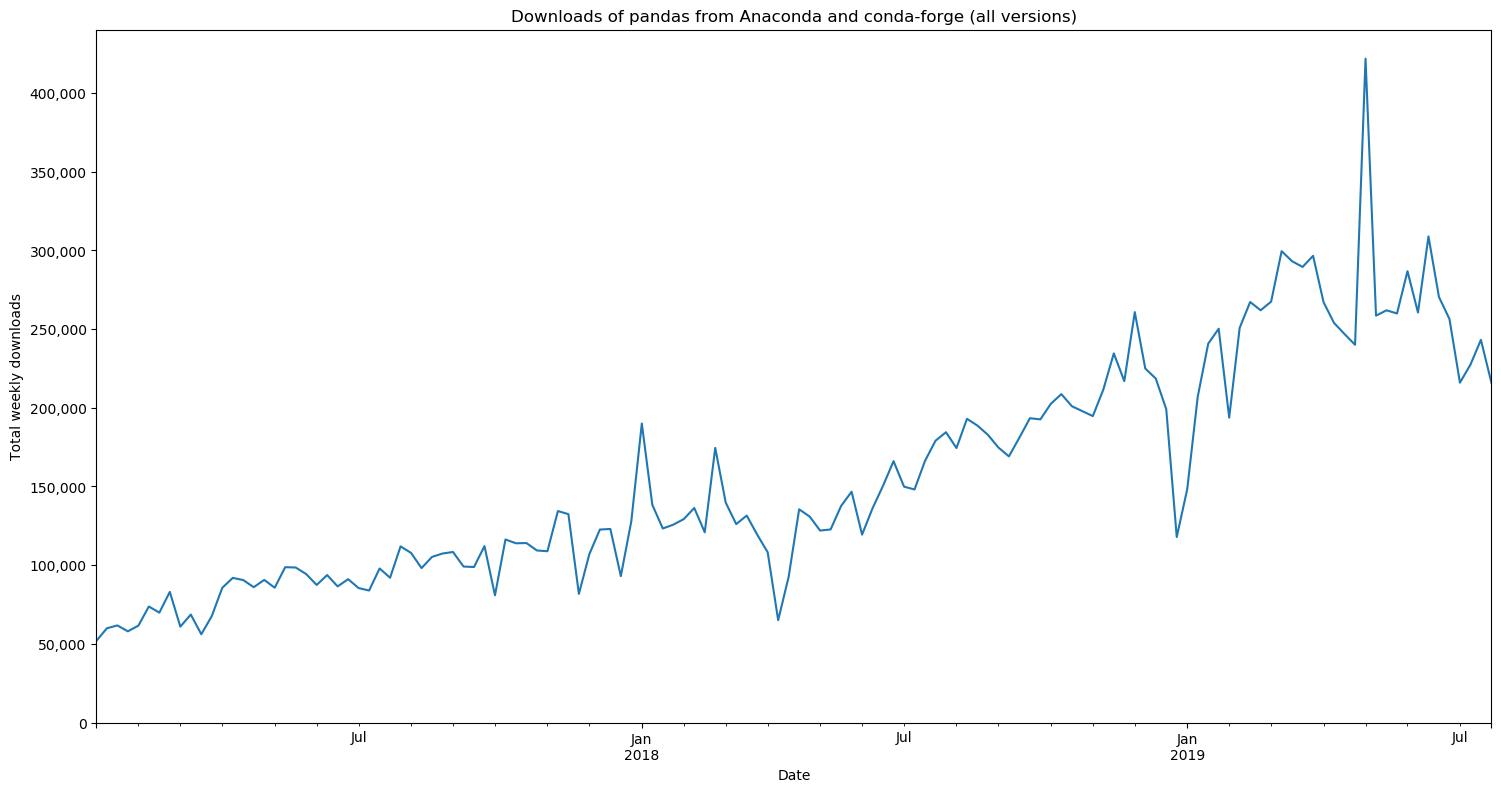

In [60]:
import matplotlib
from matplotlib import pyplot

ax = downloads_over_time.resample('1w').sum()[1:-1].plot()
pyplot.title('Downloads of pandas from Anaconda and conda-forge (all versions)')
pyplot.xlabel('Date')
pyplot.ylabel('Total weekly downloads')
pyplot.ylim(0, None)
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

## PyPI downloads

In [45]:
import requests

resp = requests.get('https://pypistats.org/api/packages/pandas/overall')
resp.raise_for_status()
data = resp.json()

In [53]:
import pandas

df_pypi = pandas.DataFrame(data['data'])
df_pypi['date'] = pandas.to_datetime(df_pypi['date'])
downloads_over_time_pypi = df_pypi.groupby('date')['downloads'].sum()

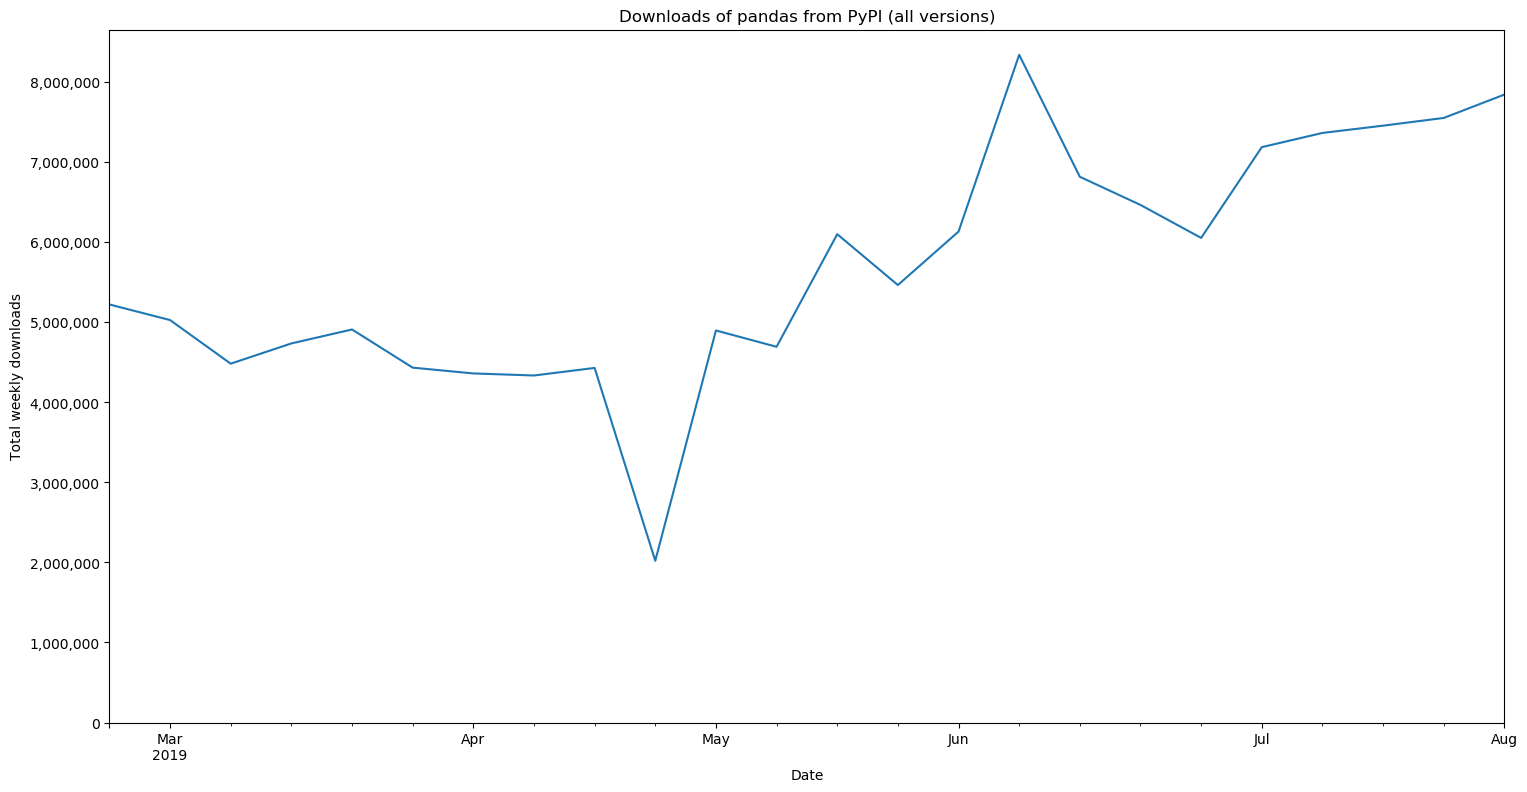

In [62]:
import matplotlib
from matplotlib import pyplot

ax = downloads_over_time_pypi.resample('1w').sum()[1:-1].plot()
pyplot.title('Downloads of pandas from PyPI (all versions)')
pyplot.xlabel('Date')
pyplot.ylabel('Total weekly downloads')
pyplot.ylim(0, None)
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))